## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from matplotlib import pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')


# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(combined_data_df["Mouse ID"].unique())
mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = combined_data_df.loc[combined_data_df.duplicated(subset =['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dups


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_full_data = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_full_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_data_df =combined_data_df[combined_data_df['Mouse ID'].isin(dups)==False]
new_combined_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(new_combined_data_df["Mouse ID"].unique())
new_mice_count

248

In [7]:
all_mice = new_combined_data_df["Mouse ID"]
timecount = new_combined_data_df["Timepoint"]

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_and_tumor_volume = new_combined_data_df[["Drug Regimen", "Tumor Volume (mm3)"]]
regimen_and_tumor_volume = regimen_and_tumor_volume.set_index("Drug Regimen")
groupby_regimen_and_tumor_volume_df= regimen_and_tumor_volume.groupby(['Drug Regimen'])
groupby_regimen_and_tumor_volume_df.count().head()


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


In [9]:
mean = groupby_regimen_and_tumor_volume_df["Tumor Volume (mm3)"].mean()



In [10]:
median = groupby_regimen_and_tumor_volume_df["Tumor Volume (mm3)"].median()


In [11]:
variance = groupby_regimen_and_tumor_volume_df["Tumor Volume (mm3)"].var()


In [12]:
standard_dev = groupby_regimen_and_tumor_volume_df["Tumor Volume (mm3)"].std()


In [13]:
standard_error = groupby_regimen_and_tumor_volume_df["Tumor Volume (mm3)"].sem()


In [14]:
regimen_tumor_summary_df = pd.DataFrame({"Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation": standard_dev,
                            "SEM": standard_error})
regimen_tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_and_tumor_volume.groupby('Drug Regimen').aggregate(['mean', 'median','var','std','sem'])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Filter the DataFrame down only to those columns to chart
drug_and_timepoints = new_combined_data_df['Drug Regimen'].value_counts()


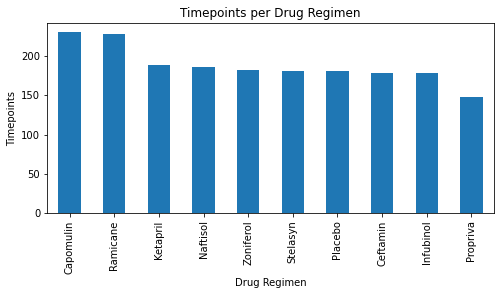

<Figure size 432x288 with 0 Axes>

In [17]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_and_timepoints.plot(kind="bar", figsize=(8,3.5))

# Set a title for the chart
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()
plt.tight_layout()

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#groupby_drug_and_timepoints
drug_and_timepoints = new_combined_data_df['Drug Regimen'].value_counts()



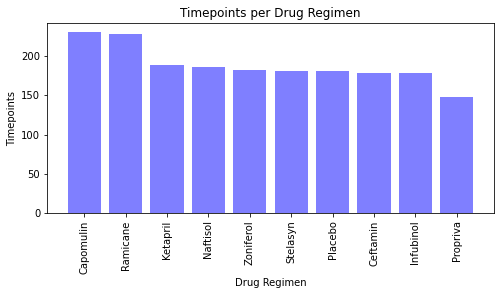

<Figure size 432x288 with 0 Axes>

In [19]:

plt.figure(figsize=(8,3.5))
plt.bar(drug_and_timepoints.index.values,drug_and_timepoints.values, color='blue', alpha=0.5, align="center")
#x_axis = np.arange(len(drug_and_timepoints))
#plt.xticks(x_axis, tick_locations, groupby_drug_and_timepoints["Drug Regimen"], rotation="vertical")

plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()




(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

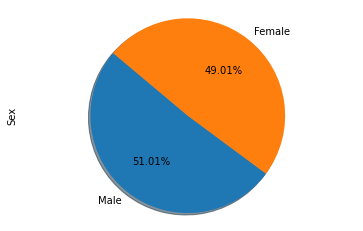

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


mice_sex_counts = new_combined_data_df["Sex"].value_counts()

mice_sex_counts.plot(kind="pie", autopct="%.1f1%%", shadow=True, startangle=140)
plt.axis("equal")



(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

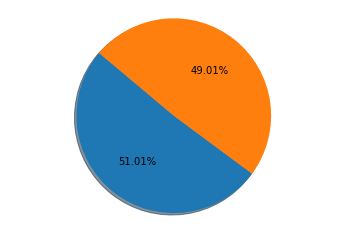

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_counts = new_combined_data_df["Sex"].value_counts()

plt.pie(mice_sex_counts.values,autopct="%.1f1%%", shadow=True, startangle=140)
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [22]:
new_combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tumor = new_combined_data_df.groupby(["Mouse ID"])["Timepoint"].max()

greatest_tumor = greatest_tumor.reset_index()

# Merge new df with original df
newly_combined_df = greatest_tumor.merge(new_combined_data_df,on=['Mouse ID','Timepoint'],how="left")

newly_combined_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 

    # Determine outliers using upper and lower bounds
    
for treatment in treatments:
        
        last_tumor_volume = newly_combined_df.loc[newly_combined_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
        tumor_volume_list.append(last_tumor_volume)


In [25]:
quartiles = last_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = last_tumor_volume.loc[(last_tumor_volume < lower_bound) | (last_tumor_volume > upper_bound)]

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


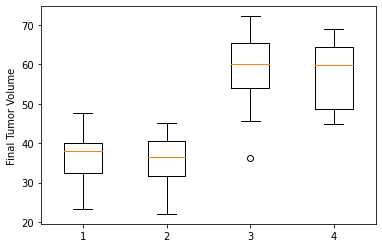

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_volume_list)


plt.show()


## Line and Scatter Plots

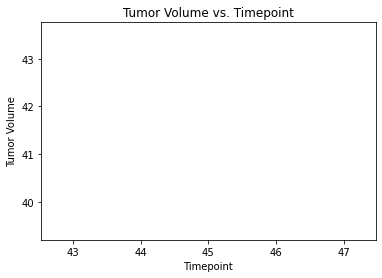

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_new = newly_combined_df.loc[newly_combined_df['Drug Regimen'] == "Capomulin"]

one_mouse_info = capomulin_new.loc[capomulin_new['Mouse ID']=='l509']

plt.plot(one_mouse_info['Timepoint'], one_mouse_info['Tumor Volume (mm3)'])

plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")





plt.show()



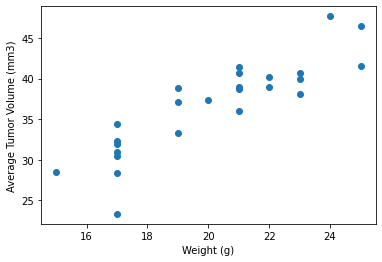

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_tumor_weight = newly_combined_df.loc[newly_combined_df['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin_tumor_weight.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

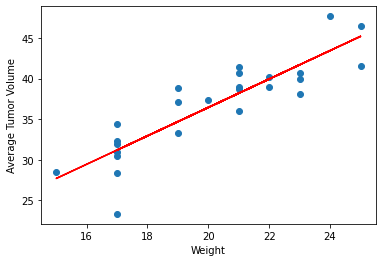

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_tumor_weight = newly_combined_df.loc[newly_combined_df['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin_tumor_weight.groupby(['Mouse ID']).mean()

correlation =round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)

model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

plt.plot(capomulin_avg['Weight (g)'],y_values,"r-")

plt.xlabel('Weight')

plt.ylabel('Average Tumor Volume')
plt.show()


In [33]:
capomulin_new


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3
